<a href="https://colab.research.google.com/github/hitomitsu50/Sports_data_portfolio_MLB_Statcast/blob/main/2025%E5%B9%B4Statcast_%EF%BE%8C%EF%BD%AB%EF%BD%B0%EF%BD%BC%EF%BD%B0%EF%BE%91%E5%9B%9E%E8%BB%A2%E6%95%B0TOP10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#ライブラリのインストール
!pip install pybaseball japanize_matplotlib
!sudo apt-get -y update
!sudo apt-get -y install fonts-ipaexfont

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 39.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 426.1/426.1 kB 31.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 432.7/432.7 kB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 72.7 MB/s eta 0:00:00
  Created wheel for japanize_matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=2bd5b46abcd2e2c477dfb0f633e9b04a8d3223d0a586a364aaf485c925915901
  Stored in directory: /root/.cache/pip/wheels/c1/f7/9b/418f19a7b9340fc16e071e89efc379aca68d40238b258df53d
Successfully built japanize_matplotlib
Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://cli.github.com/packages stable InRelease [3,917 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:5 http://archive.ubuntu.com/ubuntu

In [5]:
#ライブラリーのインポート
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import japanize_matplotlib
import time
import glob
from pybaseball import statcast

In [6]:
#データの読み込みと結合
#ファイル名パターンに一致するＣＳＶを取得
csv_files_pattern="sample_data/statcast_*.csv"
csv_files=glob.glob(csv_files_pattern)

In [7]:
#各ＣＳＶファイルを読み込み リストに格納
dfs=[]
for file in csv_files:
  try:
    df_month=pd.read_csv(file)
    dfs.append(df_month)
    print(f"{file}を読み込みました。")
  except Exception as e:
    print(f"{file}の読み込み中にエラーが発生: {e}")


sample_data/statcast_2025-07-01-2025-07-31.csvを読み込みました。
sample_data/statcast_2025-08-01-2025-08-31.csvを読み込みました。
sample_data/statcast_2025-05-01-2025-05-31.csvを読み込みました。
sample_data/statcast_2025-06-01-2025-06-30.csvを読み込みました。
sample_data/statcast_2025-04-01-2025-04-30.csvを読み込みました。
sample_data/statcast_2025-03-18-2025-03-31.csvを読み込みました。
sample_data/statcast_2025-09-01-2025-09-28.csvを読み込みました。


In [8]:
#全てのデータフレームを結合
if dfs:
  df_combined=pd.concat(dfs, ignore_index=True)
  df=df_combined #結合したファイルをｄｆに格納
  print("全てのデータフレームを結合しました。")
  display(df.head())
  print(f"結合後の行数: {len(df)}")
else:
  print("読み込めるＣＳＶファイルが見つかりませんでした。")

全てのデータフレームを結合しました。


,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,batter_days_until_next_game,api_break_z_with_gravity,api_break_x_arm,api_break_x_batter_in,arm_angle,attack_angle,attack_direction,swing_path_tilt,intercept_ball_minus_batter_pos_x_inches,intercept_ball_minus_batter_pos_y_inches
0,FF,2025-07-31,94.9,-1.51,5.49,"Iglesias, Raisel",666158,628452,field_out,hit_into_play,...,1.0,1.03,0.80,-0.80,33.4,14.625621,5.139658,26.105401,39.877731,29.346793
1,CH,2025-07-31,88.6,-1.83,5.27,"Iglesias, Raisel",666158,628452,NaN,foul,...,1.0,2.09,1.07,-1.07,27.5,24.633351,-10.604571,30.797530,36.951177,47.111399
2,FF,2025-07-31,96.4,-2.57,4.90,"Iglesias, Raisel",668715,628452,strikeout,swinging_strike,...,1.0,1.21,1.09,1.09,22.3,-10.379971,49.317661,30.875973,29.386007,10.276153
3,FF,2025-07-31,95.7,-1.49,5.55,"Iglesias, Raisel",668715,628452,NaN,called_strike,...,1.0,1.14,0.67,0.67,35.6,NaN,NaN,NaN,NaN,NaN
4,FF,2025-07-31,93.0,-2.06,5.11,"Iglesias, Raisel",668715,628452,NaN,called_strike,...,1.0,1.47,0.92,0.92,23.6,NaN,NaN,NaN,NaN,NaN


結合後の行数: 742080


/tmp/ipython-input-3713940382.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  plot=sns.barplot(data=top_10_spin,x="Avg_Spin", y="player_name",palette="crest")


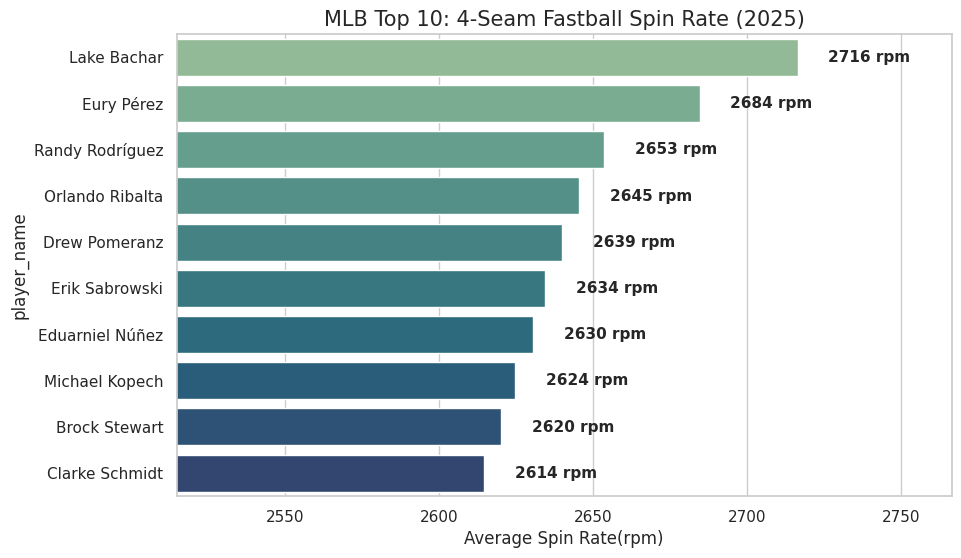

In [10]:
# --- 1. 4シーム（ＦＦ）のデータ抽出 ---
df_4seam=df[df["pitch_type"]=="FF"].copy()

# --- 2. 投手ごとの集計 ---
# releace_spin_rate=回転数
pitcher_spin=df_4seam.groupby("player_name").agg(
    Avg_Spin=("release_spin_rate", "mean"),
    Pitch_Count=("release_spin_rate", "count")
).reset_index()

# --- 3. １００球以上の投手に絞る ---
MIN_PITCHERS=100
top_10_spin=pitcher_spin[pitcher_spin["Pitch_Count"] >=
                         MIN_PITCHERS].sort_values(by="Avg_Spin",ascending=False).head(10)
# ---3.5 名前の入れ替え 姓、名 → 名、姓 へ ---
def reformat_name(name):
  if "," in name:
      last, first = name.split(", ")
      return f"{first} {last}"
  return name

top_10_spin["player_name"]=top_10_spin["player_name"].apply(reformat_name)

# --- 4. 可視化（フルネーム ＆ 右側に単位） ---
plt.figure(figsize=(10,6))
sns.set_theme(style="whitegrid")

#player_namehはStatcastでは元々フルネーム(LastName, FirstName)です。
plot=sns.barplot(data=top_10_spin,x="Avg_Spin", y="player_name",palette="crest")

#数値と単位（ｒｐｍ）を右側に表示
for p in plot.patches:
  width=p.get_width()
  plot.text(width + 10, p.get_y() + p.get_height()/2, f"{int(width)} rpm",
            va="center", fontweight="bold",fontsize=11)

plt.title("MLB Top 10: 4-Seam Fastball Spin Rate (2025)", fontsize=15)
plt.xlabel("Average Spin Rate(rpm)")
plt.xlim(min(top_10_spin["Avg_Spin"]) -100, max(top_10_spin["Avg_Spin"]) + 50)
plt.show()